This data is downloaded from : http://datasets.wri.org/dataset/globalpowerplantdatabase.

It is an attempt to analyse power plants around the world , to understand the demand and supply of power by country . Also its an attempt to see how many countries are having a hybrid model of power generation where in there is a mix of renewable and non-renewable resources. 

The data consists of 28K odd records of power plant distribution in 164 countries along wih their latitude and longitude location. 
Each plant's capacity in MW , type of fuel used in the generation is also mentioned .All of them have atleast one fuel type mentioned.There are a combination of four type of fuels , however first fuel is always specified and not many have the other three fuels. There are 12 different fuel types ranging from non-renewable types such as coal , gas as well as renewables such as hydro , wind, solar etc .  Commissioning year and year_of_capacity data are not completely provided(50%). Hence we may not be able to do analysis based on those dates. 

Questions to be asked :
1. Which fuel type has the largest power generation capacity ?
2. Country wise largest power generation capacity and by fuel type ? 
3. Country wise percentage of power generation by renewables to non renewables ? Which are the leading and lagging countries in the use of renewables ? 
4. Which country has the largest number of power plants under the renewable group as well as non - renewable group ? 

5. How do the number of plants vary for every fuel type ?
6. How do the estimation of power generation vary with the actual capacity ? 


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
power_plant = pd.read_csv('global_power_plant_database.csv')

In [74]:
power_plant.shape

(28664, 22)

In [75]:
power_plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28664 entries, 0 to 28663
Data columns (total 22 columns):
country                     28664 non-null object
country_long                28664 non-null object
name                        28644 non-null object
gppd_idnr                   28664 non-null object
capacity_mw                 28664 non-null float64
latitude                    28664 non-null float64
longitude                   28664 non-null float64
fuel1                       28661 non-null object
fuel2                       1705 non-null object
fuel3                       296 non-null object
fuel4                       108 non-null object
commissioning_year          14952 non-null float64
owner                       18093 non-null object
source                      28664 non-null object
url                         28664 non-null object
geolocation_source          28243 non-null object
year_of_capacity_data       16145 non-null float64
generation_gwh_2013         439 non-null 

In [76]:
power_plant.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,fuel1,fuel2,fuel3,...,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN


In [9]:
power_plant.describe(include = 'all')

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,fuel1,fuel2,fuel3,...,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
count,28664,28664,28644,28664,28664.000000,28664.000000,2.866400e+04,28661,1705,296,...,18093,28664,28664,28243,16145.000000,439.000000,455.000000,958.000000,8326.000000,27536.000000
unique,164,164,28261,28664,NaN,NaN,NaN,15,11,11,...,8746,823,5082,23,NaN,NaN,NaN,NaN,NaN,NaN
top,USA,United States of America,Santo Antônio,GBR0003248,NaN,NaN,NaN,Hydro,Gas,Gas,...,Lightsource Renewable Energy,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,NaN,NaN,NaN,NaN,NaN,NaN
freq,8119,8119,6,1,NaN,NaN,NaN,7034,1010,138,...,122,8077,8077,8077,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,186.097600,68.817502,9.925621e+01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2016.035367,2339.270238,2622.049124,1859.660249,532.668481,807.796919
std,NaN,NaN,NaN,NaN,523.027253,3610.172087,1.092781e+04,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.258145,4384.011370,4138.194312,3965.618811,1935.490760,2687.873796
min,NaN,NaN,NaN,NaN,1.000000,-77.847000,-1.799777e+02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2000.000000,0.000000,0.000000,0.000000,-768.620000,0.000000
25%,NaN,NaN,NaN,NaN,4.795850,28.010225,-7.905748e+01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2016.000000,226.735625,253.466300,57.898941,3.197500,8.099628
50%,NaN,NaN,NaN,NaN,18.640000,39.950000,-3.928400e+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2016.000000,731.334950,1015.676100,468.989500,20.354000,44.796959
75%,NaN,NaN,NaN,NaN,99.200000,46.980275,2.100702e+01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2016.000000,2636.217675,3170.871000,2152.211500,176.508999,293.907237


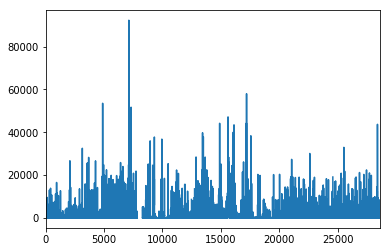

In [77]:
power_plant['estimated_generation_gwh'].plot()

In [3]:
power_plant.isnull().sum()

country                         0
country_long                    0
name                           20
gppd_idnr                       0
capacity_mw                     0
latitude                        0
longitude                       0
fuel1                           3
fuel2                       26959
fuel3                       28368
fuel4                       28556
commissioning_year          13712
owner                       10571
source                          0
url                             0
geolocation_source            421
year_of_capacity_data       12519
generation_gwh_2013         28225
generation_gwh_2014         28209
generation_gwh_2015         27706
generation_gwh_2016         20338
estimated_generation_gwh     1128
dtype: int64

Above count shows that 'year' columns have approxmately 50% missing values . Hence analysis based on the dates will not give the correct answers. 
So also , the power generation figures for 2013 - 2016 have 90% missing values .
We may be able to use only the 'estimated_generation_gwh' for our analysis.

Among the  fuel columns, only 'fuel1' has 3 missing values, while the remaining fuel have more than 90% missing values.Hence only 'fuel1' will be used for the analysis. 

In [79]:
power_plant.loc[power_plant['commissioning_year']!= 0,]['commissioning_year'].value_counts()

2014.000000    768
2015.000000    760
2016.000000    760
2012.000000    704
2013.000000    645
2011.000000    579
2009.000000    521
2010.000000    486
2008.000000    416
2006.000000    374
2005.000000    319
2007.000000    314
2002.000000    311
2004.000000    281
2003.000000    270
2001.000000    263
2017.000000    254
2000.000000    220
1989.000000    161
1999.000000    160
1988.000000    158
1985.000000    152
1987.000000    138
1998.000000    137
1990.000000    137
1986.000000    135
1994.000000    133
1996.000000    132
1993.000000    131
1995.000000    126
              ... 
1959.176471      1
1977.773234      1
1945.051948      1
1983.942857      1
1965.624853      1
2006.282609      1
2000.189189      1
2000.534021      1
1996.400000      1
2003.824765      1
1964.148587      1
2014.278431      1
1984.425926      1
2009.763926      1
1986.814159      1
1972.343626      1
1970.335055      1
2007.257143      1
2002.774834      1
1928.112903      1
2013.520396      1
1933.666667 

In [53]:
power_plant.loc[power_plant['year_of_capacity_data']!= 0,]['year_of_capacity_data'].value_counts()

2016.0    11903
2017.0     3371
2012.0      400
2015.0      291
2018.0       73
2000.0       58
2014.0       27
2013.0       20
2010.0        1
2009.0        1
Name: year_of_capacity_data, dtype: int64

In [31]:
power_plant['country'].value_counts(dropna = False)

USA    8119
CHN    2901
GBR    2567
BRA    2340
FRA    2018
CAN    1154
DEU     980
IND     845
ESP     613
PRT     462
CZE     450
AUS     419
JPN     325
NOR     306
CHL     253
MEX     251
ITA     247
ARG     241
VNM     219
FIN     184
SWE     167
THA     167
CHE     166
IDN     158
RUS     157
KOR     124
AUT     103
IRN     100
PHL      98
ZAF      98
       ... 
GUF       5
BTN       5
LVA       5
MWI       5
BRN       4
MLI       4
MNE       3
SLE       3
GNQ       3
TGO       3
CPV       3
MOZ       3
PRY       3
CYP       3
BDI       3
ATA       2
BWA       2
LUX       2
ZWE       2
MNG       2
CAF       2
KOS       2
BEN       2
ERI       2
LBR       2
GMB       2
ESH       1
GNB       1
DJI       1
LSO       1
Name: country, Length: 164, dtype: int64

In [36]:
len(power_plant['country'].unique())

164

In [12]:
power_plant['name'].unique()

array(['Kajaki Hydroelectric Power Plant Afghanistan',
       'Mahipar Hydroelectric Power Plant Afghanistan',
       'Naghlu Dam Hydroelectric Power Plant Afghanistan', ...,
       'Victoria Falls', 'Hwange Coal Power Plant Zimbabwe',
       'Kariba Dam South Hydroelectric Power Station Zimbabwe'], dtype=object)

In [17]:
power_plant['capacity_mw'].describe()

count    28664.000000
mean       186.097600
std        523.027253
min          1.000000
25%          4.795850
50%         18.640000
75%         99.200000
max      22500.000000
Name: capacity_mw, dtype: float64

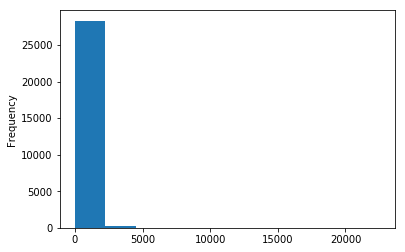

In [18]:
power_plant['capacity_mw'].plot.hist()

In [23]:
power_plant['fuel1'].unique()

array(['Hydro', 'Gas', 'Other', 'Oil', 'Wind', 'Nuclear', 'Coal', 'Solar',
       'Waste', 'Biomass', 'Wave and Tidal', 'Geothermal', nan,
       'Cogeneration', 'Storage', 'Petcoke'], dtype=object)

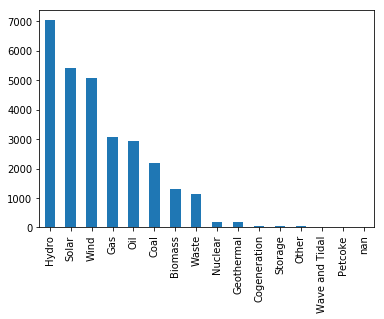

In [26]:
power_plant['fuel1'].value_counts(dropna = False).plot.bar()

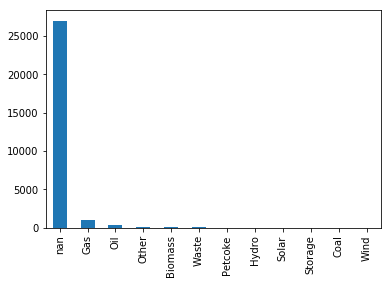

In [27]:
power_plant['fuel2'].value_counts(dropna = False).plot.bar()

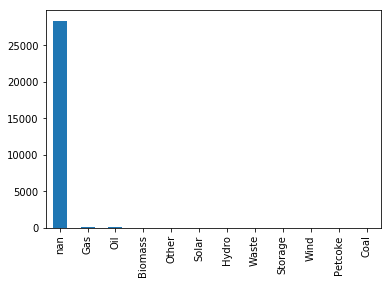

In [28]:
power_plant['fuel3'].value_counts(dropna = False).plot.bar()

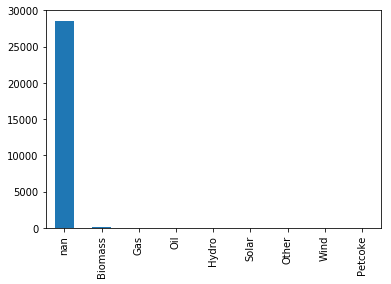

In [29]:
power_plant['fuel4'].value_counts(dropna = False).plot.bar()

In [41]:
power_plant['geolocation_source'].value_counts(dropna = False)

U.S. Energy Information Administration                                                 8077
WRI                                                                                    2912
UK Renewable Energy Planning Database                                                  2442
Open Power System Data                                                                 2392
Agência Nacional de Energia Elétrica (Brazil)                                          2338
Industry About                                                                         2052
GEODB                                                                                  1811
UNFCCC CDM Registry                                                                    1598
CARMA                                                                                  1319
Natural Resources Canada                                                               1125
Energias Endogenas de Portugal                                                  

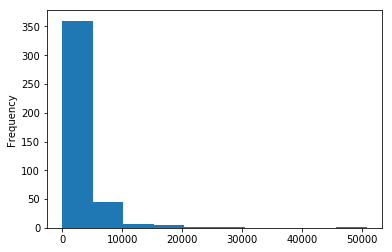

In [55]:
power_plant.loc[power_plant['generation_gwh_2013'] > 0,'generation_gwh_2013'].plot.hist()

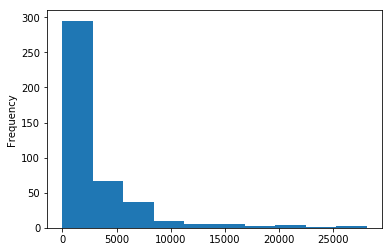

In [56]:
power_plant.loc[power_plant['generation_gwh_2014'] > 0,'generation_gwh_2014'].plot.hist()

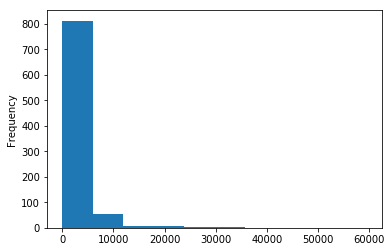

In [58]:
power_plant.loc[power_plant['generation_gwh_2015'] > 0,'generation_gwh_2015'].plot.hist()

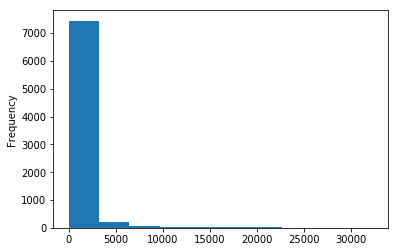

In [60]:
power_plant.loc[power_plant['generation_gwh_2016'] > 0,'generation_gwh_2016'].plot.hist()

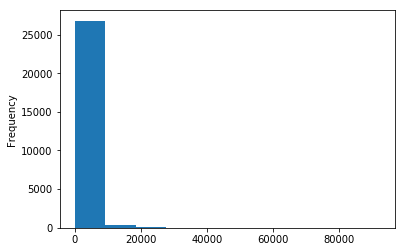

In [59]:
power_plant.loc[power_plant['estimated_generation_gwh'] > 0,'estimated_generation_gwh'].plot.hist()

The plot shows that 90% of the power plants have an power generation estimation of 10k gwh . 

In [4]:
power_plant = power_plant.fillna(0)

In [81]:
power_plant.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
count,28664.000000,28664.000000,2.866400e+04,28664.000000,28664.000000,28664.000000,28664.000000,28664.000000,28664.000000,28664.000000
mean,186.097600,68.817502,9.925621e+01,1040.494428,1135.532061,35.826808,41.621279,62.153032,154.723617,776.008092
std,523.027253,3610.172087,1.092781e+04,996.576363,999.937752,613.369712,615.342059,797.990227,1070.756223,2639.131720
min,1.000000,-77.847000,-1.799777e+02,0.000000,0.000000,0.000000,0.000000,0.000000,-768.620000,0.000000
25%,4.795850,28.010225,-7.905748e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.221144
50%,18.640000,39.950000,-3.928400e+00,1938.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,38.066204
75%,99.200000,46.980275,2.100702e+01,2005.000000,2016.000000,0.000000,0.000000,0.000000,0.577000,268.576751
max,22500.000000,415750.000000,1.075744e+06,2018.000000,2018.000000,50834.000000,28127.000000,59546.865000,32377.477000,92268.763466


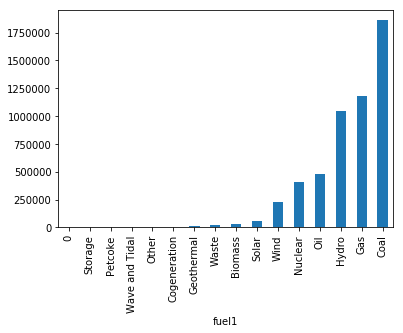

In [7]:
power_plant.groupby('fuel1')['capacity_mw'].sum().sort_values().plot.bar()

Fuel types of Coal and Gas have the highest power generation capacity world wide , followed by hydro and oil. 

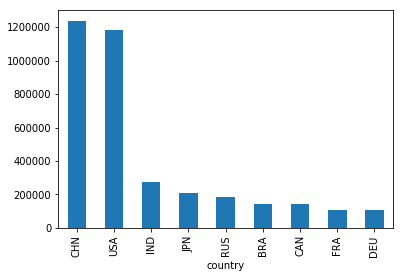

In [8]:
power_plant.groupby('country')['capacity_mw'].sum().sort_values(ascending = False)[0:9].plot.bar()

China , USA have the maximum power generation capacity followed by India and Japan. China and USA have a huge lead in power generation , which is more than 4 times India's power generation. 

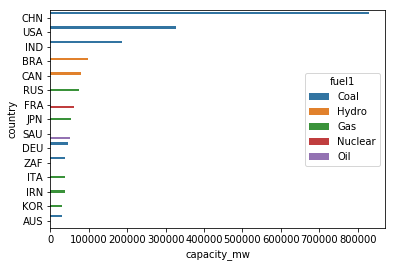

In [31]:
import seaborn as sns
temp_df = power_plant.groupby(['country','fuel1'], as_index = False)['capacity_mw'].sum().sort_values('capacity_mw', ascending = False)
top_temp_df = temp_df.groupby('country', as_index = False).first().sort_values('capacity_mw', ascending = False).head(15)
sns.barplot(y= "country" , x = "capacity_mw", hue = 'fuel1', data = top_temp_df)

The plot shows the maximum power generation by country and fuel type. Only the top 15 countries have been plotted. 
China and USA have the maximum power generation capacity with coal as fuel type , followed by India. 
China has great margin , more than 2 times of USA . 
Brazil , Canada have their maximum power generation with hydro. 
Russia and Japan have gas power plants generating maximum power and Saudi Arabia has oil run power plant respectively.

In [5]:
power_plant['energy_flag'] = power_plant['fuel1'].apply(lambda x: 'Non-Renewable' if x in ['Coal','Gas','Oil','Nuclear'] else 'Renewable')

In [83]:
power_plant['energy_flag'].value_counts()

Renewable        20300
Non-Renewable     8364
Name: energy_flag, dtype: int64

In [7]:
energy_df = power_plant.groupby(['country','energy_flag'] , as_index = False)['capacity_mw'].sum().sort_values('capacity_mw',ascending = False)


In [192]:
energy_df.head()

,country,energy_flag,capacity_mw
278,USA,Non-Renewable,956694.400
48,CHN,Non-Renewable,923903.100
49,CHN,Renewable,313575.280
279,USA,Renewable,227161.150
123,IND,Non-Renewable,222339.951


In [8]:
# Expand the dataframe to 'wide ' tidy format .  
energy_df.pivot_table(index = "country", columns = "energy_flag", fill_value = 0).head()

capacity_mw          
energy_flag Non-Renewable Renewable
country                            
AFG                42.000    238.55
AGO               300.580    770.60
ALB                 0.000   1529.00
ARE             29487.000    120.00
ARG             22026.309  10374.27

In [91]:
energy_df_wide = energy_df.pivot_table(index = "country", columns = "energy_flag", fill_value= 0)


In [92]:
energy_df_wide.columns = ['non-renewable', 'renewable']

In [93]:
energy_df_wide.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, AFG to ZWE
Data columns (total 2 columns):
non-renewable    164 non-null float64
renewable        164 non-null float64
dtypes: float64(2)
memory usage: 3.8+ KB


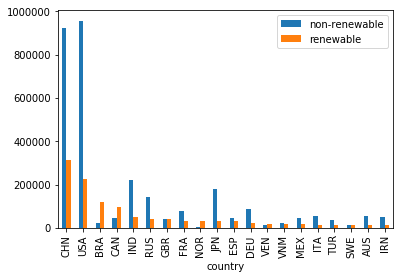

In [94]:
# Plot the countries with maximum value for renewable power along with their non-renewable power capacity.
energy_df_wide.sort_values(['renewable', 'non-renewable'], ascending = False).head(20).plot.bar()

It is seen that China leads in power generation with renewable energy. It is followed by USA . However their power generation capaicity with non-renewables far exceeds that with renewable by more than 3 times.  
The next in line for renewable power generation capacity are Brazil and Canada whose stand out with their power generation by renewable exceeding by more than 50% that produced by non-renewables. 

In [95]:
def get_percent(row):
    if row['non-renewable'] > 0:
        return  (row['renewable'] / row['non-renewable'])
        
    else:
        return 1 

energy_df_wide['percent'] = energy_df_wide.apply(get_percent , axis = 1)
energy_df_wide['percent'] = energy_df_wide['percent'].apply(lambda x: round(x , 1))


In [96]:
energy_df_wide.head()

,non-renewable,renewable,percent
country,,,
AFG,42.000,238.55,5.7
AGO,300.580,770.60,2.6
ALB,0.000,1529.00,1.0
ARE,29487.000,120.00,0.0
ARG,22026.309,10374.27,0.5


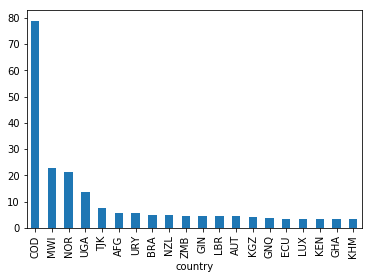

In [80]:
energy_df_wide['percent'].sort_values(ascending = False).head(20).plot.bar()

Countries such as Democratic Republic of Congo , Malawi , Tajikistan , Brazil , Uruguay , Afghanisthan , New Zealand have more power generation with renewables than non-renewables. What would be their annual power demand ? Do they import power or is the power generation with renewables sufficient ? 

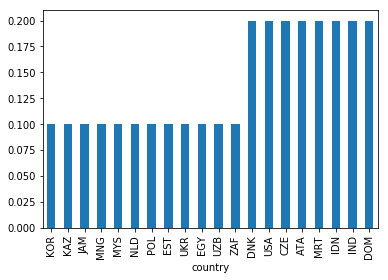

In [97]:
energy_df_wide.loc[energy_df_wide['percent'] > 0,'percent'].sort_values( ascending = True).head(20).plot.bar()

Countries such as Korea , Poland , Jamaica etc have less than 20% power generation capacity with renewable energy . 

In [98]:
energy_df_wide['total_power']= power_plant.groupby('country')['capacity_mw'].sum()

In [99]:
energy_df_wide.head()

,non-renewable,renewable,percent,total_power
country,,,,
AFG,42.000,238.55,5.7,280.550
AGO,300.580,770.60,2.6,1071.180
ALB,0.000,1529.00,1.0,1529.000
ARE,29487.000,120.00,0.0,29607.000
ARG,22026.309,10374.27,0.5,32400.579


In [101]:
energy_df_wide_country = energy_df_wide.reset_index(inplace = False)

Lets look at the percentage of renewables used in power production in the top power generation countries.

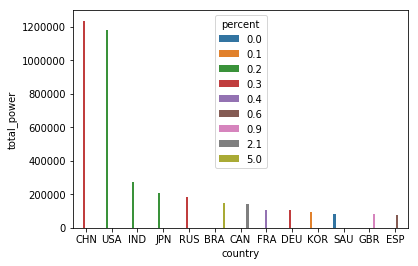

In [102]:
sns.barplot(x='country', y = 'total_power', data = energy_df_wide_country.sort_values('total_power', ascending = False).head(13), hue = 'percent')

We see that USA , India , Japan use 20% renewables in the power generation . China and Russia have 30% share of renewables , France 40%, Spain 60% , Canada 200 % and Brazil 500% .

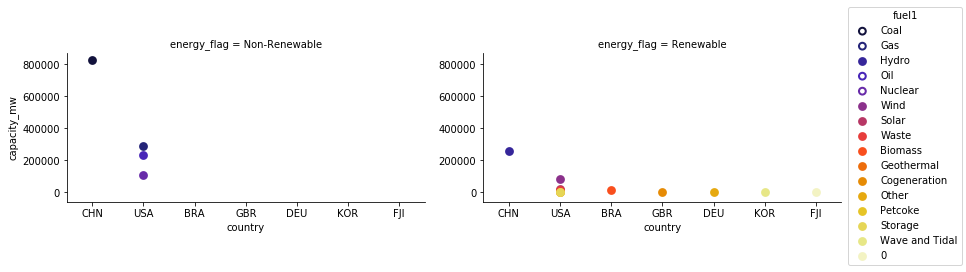

In [145]:
import seaborn as sns
temp_df = power_plant.groupby(['fuel1','country'], as_index = False)['capacity_mw'].sum().sort_values('capacity_mw', ascending = False)
top_temp_df = temp_df.groupby('fuel1', as_index = False).first().sort_values('capacity_mw', ascending = False)

top_temp_df['energy_flag'] = top_temp_df['fuel1'].apply(lambda x: 'Non-Renewable' if x in ['Coal','Gas','Oil','Nuclear'] else 'Renewable')

sns.factorplot(y ="capacity_mw", x= "country", hue = 'fuel1' , col = 'energy_flag', data = top_temp_df, kind= "point", size=3, aspect =2, palette = "CMRmap")

We see that among renewable energy , China has the maximum capacity in hydro , followed by USA in solar , geothermal , wind , petcoke , storage and Brazil in biomass.
Among the non-renewable energies , China has the lead in coal , followed by USA in oil , gas and nuclear. 


Number of installations of power plants with renewable and non-renewables as fuel. 

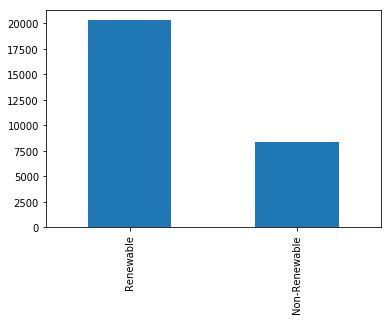

In [21]:
power_plant['energy_flag'].value_counts().plot.bar()

There are 3 times more number of power plants with renewable fuel types than with non-renewables. 

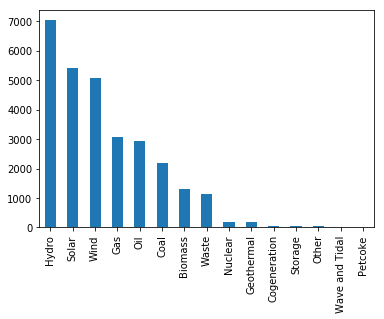

In [22]:
power_plant['fuel1'].value_counts().plot.bar()

The plot shows that renewable energy such as hydro , solar and wind have the highest number of installations. 
This is due to dependency of the installations on the geographical locations and the smaller size of the plant as compared to the coal , oil and gas power plants.  


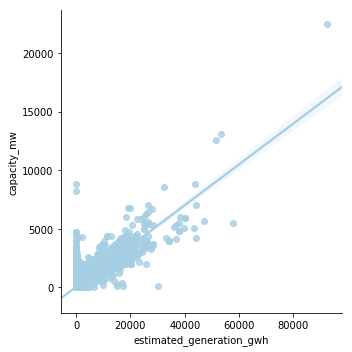

In [148]:
sns.lmplot(y= "capacity_mw" ,x = "estimated_generation_gwh", data = power_plant)

The plot shows that the estimated power generation values are proportional to the capacity . 